In [26]:
import numpy as np
import pandas as pd

In [27]:
# reads the first 10000 rows of the csv file
df = pd.read_csv('C:/Users/quent/ecole/3A/GRM/ADVI/data/taxi+service+trajectory+prediction+challenge+ecml+pkdd+2015/train.csv/train.csv')

In [28]:
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [29]:
df.drop(columns=["ORIGIN_CALL", "ORIGIN_STAND", "TAXI_ID"], inplace=True)
df.dropna(inplace=True)
df.shape

(1710670, 6)

In [30]:
#converts a string with format [[..., ...], ..., [..., ...]] into a list of list
def convert_string_to_list(string):
    if string == "[]":
        return [], False
    string = string.replace('[', '').replace(']', '')
    string = string.replace(" ", "")
    string = string.split(',')
    string = [float(x) for x in string]
    string = np.array(string).reshape(-1, 2)
    return string, True

In [31]:
# applies the function to the column polylines in order to get a numpy array with 10000 rows, each row being a list of coordinates
trajectories = df['POLYLINE'].to_numpy()
trajectories_list = []
count = 0
for i in range(len(trajectories)):
    traj, executed = convert_string_to_list(trajectories[i])
    if executed:
        trajectories_list.append(traj)
    else:
        count += 1
print("number of invalid trajectories : ",count)

number of invalid trajectories :  5901


In [32]:
# interpolates the trajectories in order to have 50 points for each trajectory

from scipy.interpolate import interp1d

def interpolate_trajectory(traj, n_points=50):
    x = np.arange(traj.shape[0])
    f = interp1d(x, traj, axis=0)
    xnew = np.linspace(0, traj.shape[0] - 1, n_points)
    ynew = f(xnew)
    return ynew

In [33]:
for i in range(len(trajectories_list)):
    trajectories_list[i] = interpolate_trajectory(trajectories_list[i])

trajectories = np.array(trajectories_list)
trajectories.shape

c:\Users\quent\ecole\3A\GRM\.venv\lib\site-packages\scipy\interpolate\_interpolate.py:710: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


(1704769, 50, 2)

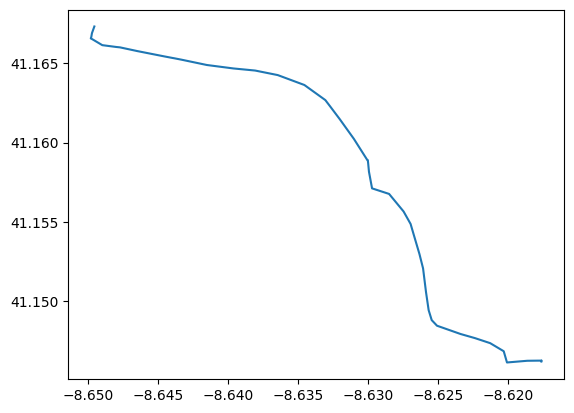

In [34]:
# checks if the interpolation worked
import random
import matplotlib.pyplot as plt
index = random.randint(0, 10000)
plt.plot(trajectories[index][:, 0], trajectories[index][:, 1])